In [13]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [14]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df = df[['Age', 'Fare', 'Survived']]

In [16]:

df

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [17]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [18]:
df.isnull().sum()

,0
Age,0
Fare,0
Survived,0


In [19]:
x = df[['Age', 'Fare']]
y = df['Survived']

In [20]:
x

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,28.0,23.4500
889,26.0,30.0000


In [21]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2, random_state= 41)

In [23]:
x_train, y_train

(      Age     Fare
 628  26.0   7.8958
 300  28.0   7.7500
 663  36.0   7.4958
 50    7.0  39.6875
 846  28.0  69.5500
 ..    ...      ...
 407   3.0  18.7500
 601  28.0   7.8958
 243  22.0   7.1250
 321  27.0   7.8958
 80   22.0   9.0000
 
 [712 rows x 2 columns],
 628    0
 300    1
 663    0
 50     0
 846    0
       ..
 407    1
 601    0
 243    0
 321    0
 80     0
 Name: Survived, Length: 712, dtype: int64)

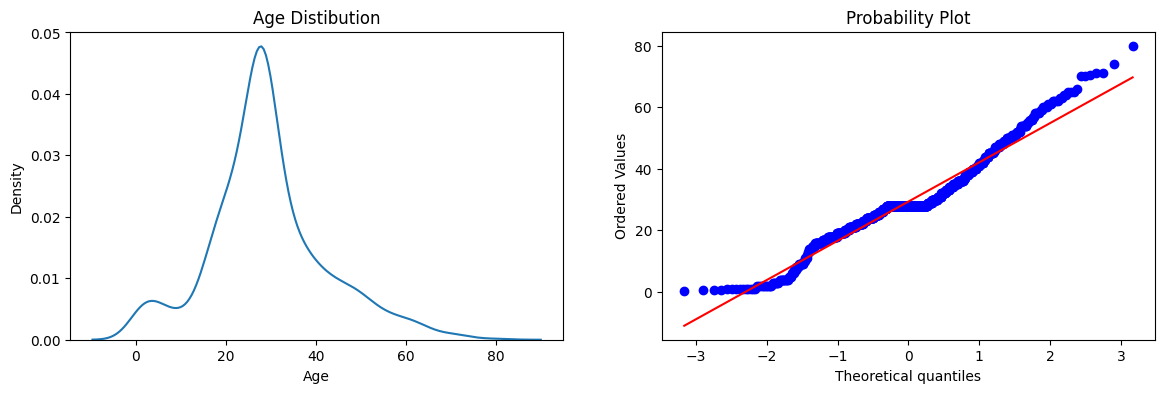

In [27]:
plt.figure(figsize= (14, 4))
plt.subplot(121)
sns.kdeplot(df['Age'])
plt.title('Age Distibution')
plt.subplot(122)
stats.probplot(df['Age'], dist= 'norm', plot= plt)
plt.show()

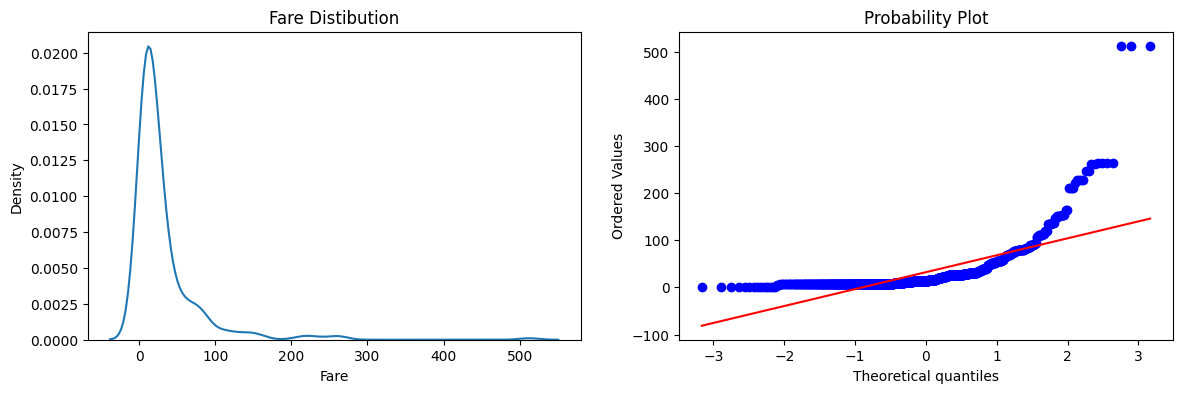

In [28]:
plt.figure(figsize= (14, 4))
plt.subplot(121)
sns.kdeplot(df['Fare'])
plt.title('Fare Distibution')
plt.subplot(122)
stats.probplot(df['Fare'], dist= 'norm', plot= plt)
plt.show()

In [29]:
clf  = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [30]:
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

print("LR ->", accuracy_score(y_test, y_pred))
print("DT ->", accuracy_score(y_test, y_pred2))

LR -> 0.6312849162011173
DT -> 0.6089385474860335


In [31]:
trf = FunctionTransformer(np.log1p)


In [32]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [33]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_trf, y_train)
clf2.fit(x_train_trf, y_train)

y_pred = clf.predict(x_test_trf)
y_pred2 = clf2.predict(x_test_trf)

print("LR ->", accuracy_score(y_test, y_pred))
print("DT ->", accuracy_score(y_test, y_pred2))

LR -> 0.6536312849162011
DT -> 0.6536312849162011
